---

In [3]:
from IPython import display
display.HTML("<style>.container { width:80% !important; }</style>")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set global random seeds for both numpy and Python's random
np.random.seed(42)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
# My goal is to implement a convolutional layer from scratch and show it in action
# A really basic example is all we need, then we can go on to ResNet -> Swin-T -> ConvNeXt

# From Scratch - Implementing the Simple Convolutional Layer

---

## Moving Averages - John the Programmer

In [6]:
np.random.seed(42)  # any integer can be used as the seed
# Let's assume John's LoC per hour follows a Normal distribution with
# mean=50 and standard deviaton=50, also John is a real workhorse in this session
# he programmed non-stop for 50 hours!
lines_of_code = np.random.normal(50, 50, 50)
print(lines_of_code)

[ 74.83570765  43.08678494  82.38442691 126.15149282  38.29233126
  38.29315215 128.96064078  88.37173646  26.5262807   77.12800218
  26.82911536  26.71351232  62.09811358 -45.66401223 -36.24589163
  21.88562354  -0.64155602  65.71236663   4.59879622 -20.61518507
 123.28243845  38.71118498  53.37641023 -21.23740931  22.78086377
  55.54612949  -7.54967887  68.78490092  19.9680655   35.41531251
  19.91466939 142.61390923  49.32513876  -2.88554645  91.12724561
 -11.0421825   60.44317975 -47.98350619 -16.40930244  59.84306179
  86.923329    58.56841406  44.21758588  34.94481522 -23.92609952
  14.00778958  26.96806145 102.85611131  67.18091448 -38.15200777]


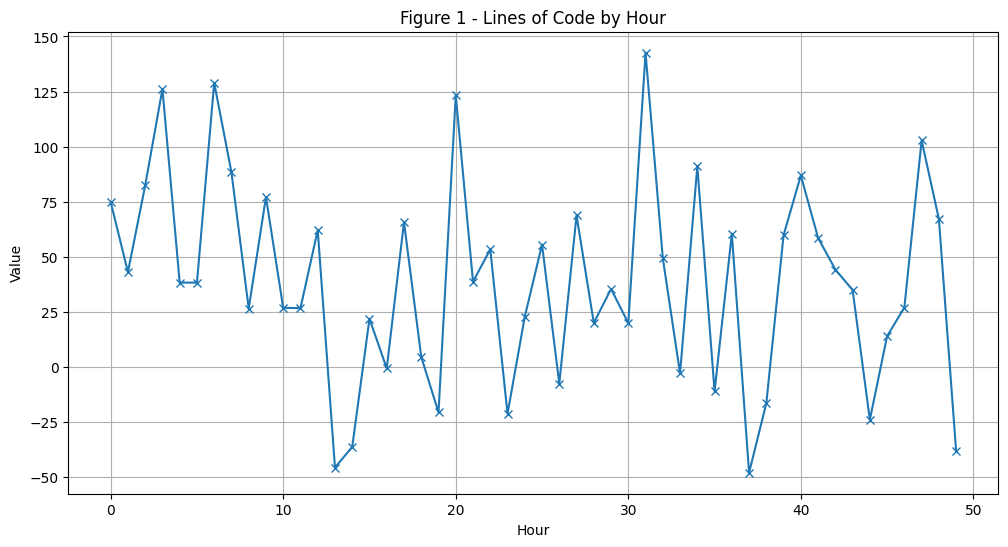

In [7]:
hours = np.arange(len(lines_of_code))

plt.figure(figsize=(12, 6))
plt.plot(hours, lines_of_code, marker='x')
plt.title('Figure 1 - Lines of Code by Hour')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [8]:
lines_of_code.mean()

38.726304737193

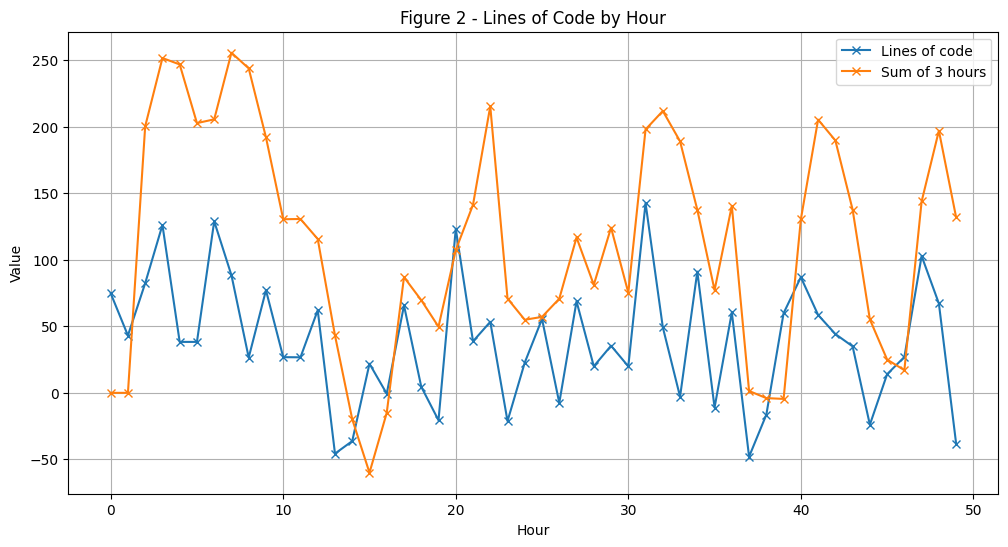

In [9]:
def sum_n(n):
    if n == 0 or n == 1:
        y_n = 0
        return y_n
    
    y_n = lines_of_code[n-2] + lines_of_code[n-1] + lines_of_code[n]
    
    return y_n

sum_lines_code_past_3_hours = []

for i in range(len(lines_of_code)):
    sum_lines_code_past_3_hours.append(sum_n(i))

hours = np.arange(len(lines_of_code))

plt.figure(figsize=(12, 6))
plt.plot(hours, lines_of_code, marker='x', label='Lines of code')
plt.plot(hours, sum_lines_code_past_3_hours, marker='x', label='Sum of 3 hours')
plt.title('Figure 2 - Lines of Code by Hour')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.grid(True)
plt.legend()  # Add the legend
plt.show()

### Moving Averages

---

#### The Math Behind MAs - Equation Time!

$$
y[2] = \frac{1}{3}x[0] + \frac{1}{3}x[1] + \frac{1}{3}x[2] \tag{1}
$$

$$
y[n] = \frac{1}{3}(x[n{-}2] + x[n{-}1] + x[n]) \tag{2} \\
$$
$$
y[n] = \frac{1}{3}\sum\limits_{k=n{-}2}^{n}x[k] \tag{3}
$$

---

#### Implementing the Moving Average

    lines_of_code[0:5] = [74.84,  43.09,  82.38, 126.15, 38.30]
    kernel = [1/3, 1/3, 1/3]
    
    y(0) = 0
    y(1) = 0
    y(2) = 1/3(74.84 + 43.09 + 82.38)
    y(3) = 1/3(43.09 + 82.38 + 126.15)
    y(4) = 1/3(82.38 + 126.15 + 38.30)


In [10]:
# We have a function to perform the multiplication and summation
# It takes a parameter n, the index of the current number
def avg_loc(n):
    # The average is undefined for the first 2 points as we do not yet have 3 numbers to average
    if n == 0 or n == 1:
        y_n = 0
        return y_n
    
    y_n = (1/3)*(lines_of_code[n-2] + lines_of_code[n-1] + lines_of_code[n])
    
    #return y_n.astype(int)
    return y_n

avg_lines_code_past_3_hours = []

# This for loop implements the summation from equation (3)
for i in range(len(lines_of_code)):
    avg_lines_code_past_3_hours.append(avg_loc(i))

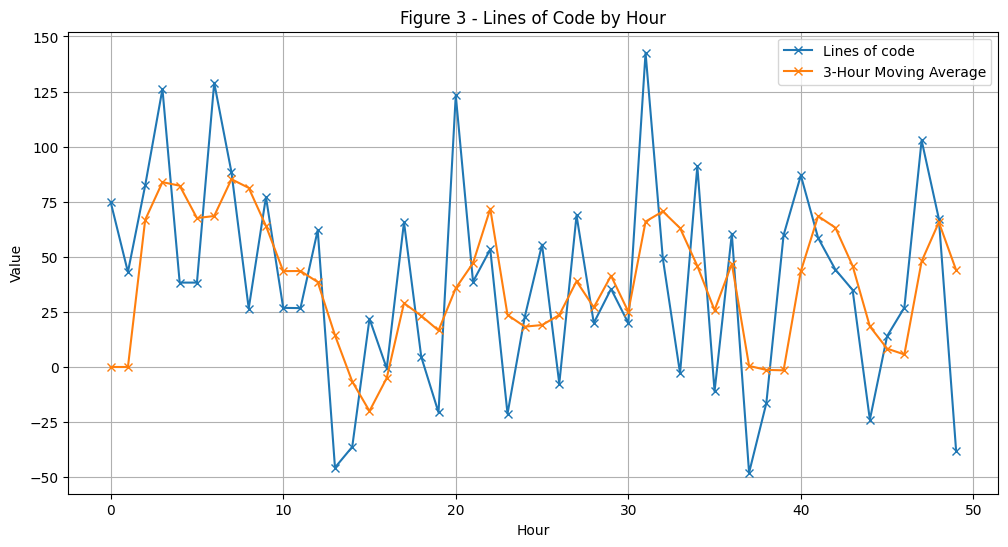

In [11]:
hours = np.arange(len(lines_of_code))

plt.figure(figsize=(12, 6))
plt.plot(hours, lines_of_code, marker='x', label='Lines of code')
plt.plot(hours, avg_lines_code_past_3_hours, marker='x', label='3-Hour Moving Average')
plt.title('Figure 3 - Lines of Code by Hour')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
print(f'0 -> 3 : {lines_of_code[0:3]} -> {sum(lines_of_code[0:3])/3}')
print(f'1 -> 4 : {lines_of_code[1:4]} -> {sum(lines_of_code[1:4])/3}')
print(f'2 -> 5 : {lines_of_code[2:5]} -> {sum(lines_of_code[2:5])/3}')
print(f'3 -> 6 : {lines_of_code[3:6]} -> {sum(lines_of_code[3:6])/3}')

0 -> 3 : [74.83570765 43.08678494 82.38442691] -> 66.76897316567901
1 -> 4 : [ 43.08678494  82.38442691 126.15149282] -> 83.87423488895888
2 -> 5 : [ 82.38442691 126.15149282  38.29233126] -> 82.2760836630897
3 -> 6 : [126.15149282  38.29233126  38.29315215] -> 67.57899207892514


---

#### The Low-Pass Filter

$$
\text{fc} = \frac{0.443}{N*T}
$$

Where N = 3 (number of periods we want to average) and T = 1 (sampling period).

$$\text{fc} = \frac{0.443}{3x1} = 0.148$$

$$1/0.148=6.75$$

##### Example - Hours 4 -> 5

$$126.15 - 38.29 = 87.86$$
$$83.87 - 82.28 = 1.59$$ $$(87.86-1.59)/87.86 * 100 = 98.19%$$

---

### The Weighted Moving Average

#### The Math of Behind WMAs

Simple Moving Average Kernel $[\frac{1}{3}, \frac{1}{3}, \frac{1}{3}]$

Weighted Moving Average Kernel$[\frac{1}{2}, \frac{1}{3}, \frac{1}{6}]$

Dot product: $a\cdot b = \sum\limits_{i=1}^{n}a[i]b[i]$. 

$$
y[n] = \sum\limits_{i=0}^{2}x[n-(2-i)]f[i], \text{where x is the window and f is the kernel}
$$


#### Implementing the WMA

In [13]:
# We pass in a kernel this time, this function will work for any kernel
def weighted_avg_loc(n, kernel):
    # The average is undefined for the first n-1 points as we do not yet have n numbers to average
    if n < len(kernel)-1:
        y_n = 0
        return y_n
    
    y_n = 0
    # The dot product is essentially a series of multiplications followed by a sum
    for i in range(len(kernel)):
        y_n += (kernel[i]*lines_of_code[n-(2-i)])
    
    return y_n.astype(int)

In [14]:
weighted_avg_lines_code_past_3_hours = []

for i in range(len(lines_of_code)):
    weighted_avg_lines_code_past_3_hours.append(weighted_avg_loc(i, kernel=[1/2, 1/3, 1/6]))

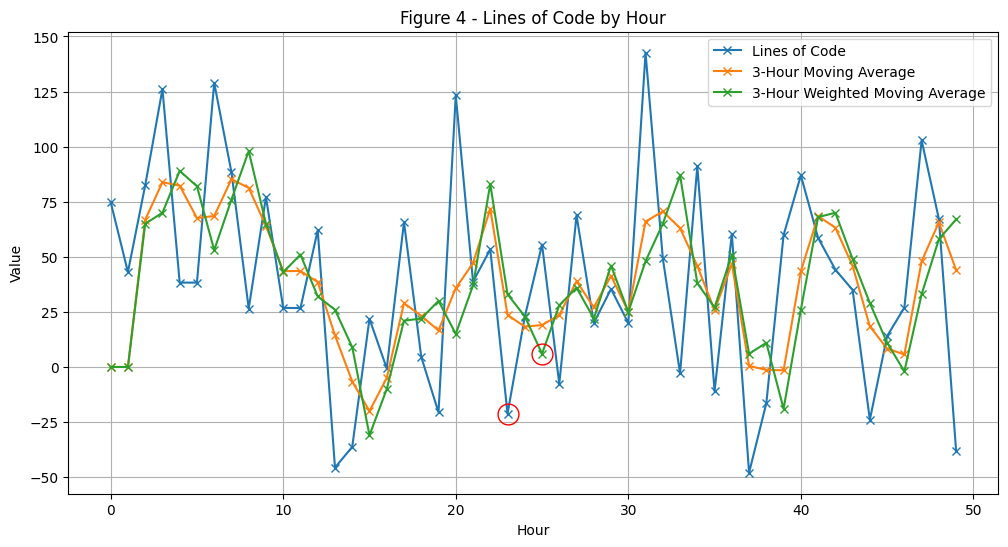

In [15]:
hours = np.arange(len(lines_of_code))
plt.figure(figsize=(12, 6))
plt.plot(hours, lines_of_code, marker='x', label='Lines of Code')
plt.plot(hours, avg_lines_code_past_3_hours, marker='x', label='3-Hour Moving Average')
plt.plot(hours, weighted_avg_lines_code_past_3_hours, marker='x', label='3-Hour Weighted Moving Average')

def highlight_point(hours, data, point_idx, marker='o', size=15, color='red'):
   """
   Highlight a specific point on the plot with a marker.
   
   Args:
       hours: x-axis data (time points)
       data: y-axis data (values to plot)
       point_idx: index of point to highlight
       marker: marker style (default: 'o' for circle)
       size: size of marker (default: 15)
       color: color of marker (default: 'red')
   """
   plt.plot(hours[point_idx], 
           data[point_idx],
           marker,
           markersize=size,
           fillstyle='none',
           color=color)

# Usage example:
highlight_point(hours, weighted_avg_lines_code_past_3_hours, 25, color='red', size=15)
highlight_point(hours, lines_of_code, 23, color='red', size=15)

plt.title('Figure 4 - Lines of Code by Hour')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.grid(True)
plt.legend()  # Add the legend
plt.show()

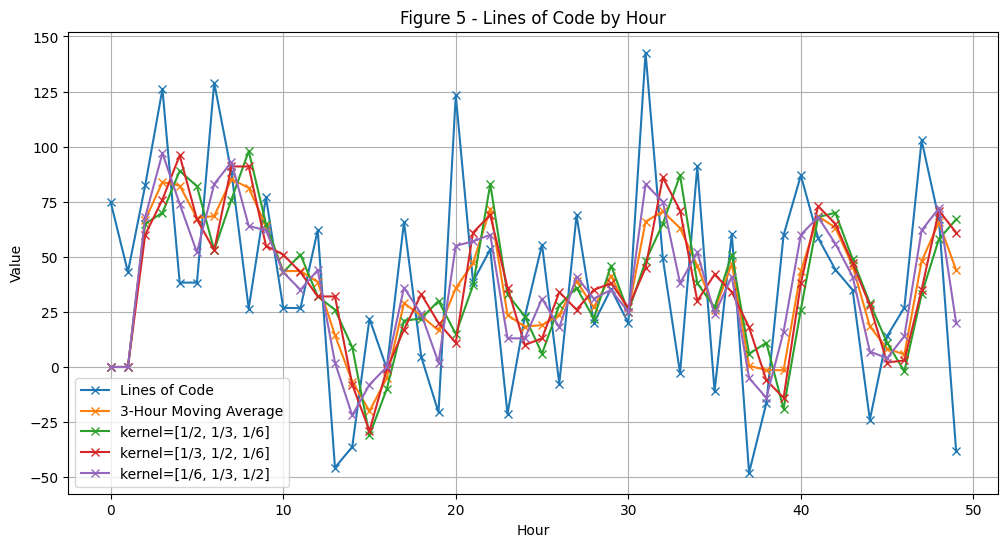

In [16]:
weighted_avg1 = []
weighted_avg2 = []
weighted_avg3 = []

for i in range(len(lines_of_code)):
    weighted_avg1.append(weighted_avg_loc(i, kernel=[1/2, 1/3, 1/6]))
    weighted_avg2.append(weighted_avg_loc(i, kernel=[1/3, 1/2, 1/6]))
    weighted_avg3.append(weighted_avg_loc(i, kernel=[1/6, 1/3, 1/2]))

hours = np.arange(len(lines_of_code))
plt.figure(figsize=(12, 6))
plt.plot(hours, lines_of_code, marker='x', label='Lines of Code')
plt.plot(hours, avg_lines_code_past_3_hours, marker='x', label='3-Hour Moving Average')
plt.plot(hours, weighted_avg1, marker='x', label='kernel=[1/2, 1/3, 1/6]')
plt.plot(hours, weighted_avg2, marker='x', label='kernel=[1/3, 1/2, 1/6]')
plt.plot(hours, weighted_avg3, marker='x', label='kernel=[1/6, 1/3, 1/2]')

plt.title('Figure 5 - Lines of Code by Hour')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.grid(True)
plt.legend()  # Add the legend
plt.show()

--- 

## 2d Filters

<center>
    <img src="https://www.cs.montana.edu/courses/spring2004/430/lectures/02/cat256.jpg" alt="Figure 6 - Cat Image">
</center>


### Box Blur


In [17]:
# code-fold: true
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

# Read image from URL - saves us from downloading it :
url = "https://www.cs.montana.edu/courses/spring2004/430/lectures/02/cat256.jpg"
# We add a header so that our reqeust looks a little real and does not return an error 403.
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url, headers=headers)
img = Image.open(BytesIO(response.content))

# Convert to numpy array 
# We select one of the three channels, the image is stored in RGB even though it is greyscale
# This is probably just to maintain a standard. All three channels are equal and you can select any of
# channel 0, 1 or 2 and get the same resulting array.
#img_array = np.array(img)[:,:,0]
img_array = np.array(img)

# Print shape and data
print("Image shape:", img_array.shape)
print("Image data:")
print(img_array)

Image shape: (256, 256)
Image data:
[[176 177 174 ... 131 129 126]
 [177 178 176 ... 131 129 126]
 [177 179 178 ... 131 127 124]
 ...
 [150 160 163 ...  91  91  93]
 [170 171 174 ...  97  96  95]
 [195 189 187 ... 102  99  97]]



Box Blur kernel:

$$
\text{kernel} = \begin{bmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9}\\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9}\\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9}
\end{bmatrix}
$$

General Box Blur Kernel:

$$
\text{kernel} = \begin{bmatrix}
\frac{1}{N^2} & \frac{1}{N^2} & \frac{1}{N^2}\\
\frac{1}{N^2} & ... & ... \\
\frac{1}{N^2} & ... &  \frac{1}{N^2}
\end{bmatrix}
$$

#### Small Example - A 3x3 Kernel

Sample data: 
$$
\begin{bmatrix}
2 & 5 & 1 & 4 & 3 \\
6 & 3 & 8 & 2 & 7 \\
1 & 4 & 2 & 5 & 1 \\
3 & 7 & 9 & 2 & 4 \\
2 & 1 & 5 & 6 & 8
\end{bmatrix}
$$

$$
\left[
\begin{matrix}
\colorbox{cyan}{2} & \colorbox{cyan}{5} & \colorbox{cyan}{1} & 4 & 3 \\
\colorbox{cyan}{6} & \colorbox{red}{3} & \colorbox{cyan}{8} & 2 & 7 \\
\colorbox{cyan}{1} & \colorbox{cyan}{4} & \colorbox{cyan}{2} & 5 & 1 \\
3 & 7 & 9 & 2 & 4 \\
2 & 1 & 5 & 6 & 8
\end{matrix}
\right]
\quad
\left[
\begin{matrix}
2 & \colorbox{cyan}{5} & \colorbox{cyan}{1} & \colorbox{cyan}{4} & 3 \\
6 & \colorbox{cyan}{3} & \colorbox{red}{8} & \colorbox{cyan}{2} & 7 \\
1 & \colorbox{cyan}{4} & \colorbox{cyan}{2} & \colorbox{cyan}{5} & 1 \\
3 & 7 & 9 & 2 & 4 \\
2 & 1 & 5 & 6 & 8
\end{matrix}
\right]
\quad
\left[
\begin{matrix}
2 & 5 & \colorbox{cyan}{1} & \colorbox{cyan}{4} & \colorbox{cyan}{3} \\
6 & 3 & \colorbox{cyan}{8} & \colorbox{red}{2} & \colorbox{cyan}{7} \\
1 & 4 & \colorbox{cyan}{2} & \colorbox{cyan}{5} & \colorbox{cyan}{1} \\
3 & 7 & 9 & 2 & 4 \\
2 & 1 & 5 & 6 & 8
\end{matrix}
\right]
\quad
\left[
\begin{matrix}
6 & 3 & 8 & 2 & 7 \\
\colorbox{cyan}{1} & \colorbox{cyan}{4} & \colorbox{cyan}{2} & 5 & 1 \\
\colorbox{cyan}{3} & \colorbox{red}{7} & \colorbox{cyan}{9} & 2 & 4 \\
\colorbox{cyan}{2} & \colorbox{cyan}{1} & \colorbox{cyan}{5} & 6 & 8 \\
2 & 1 & 5 & 6 & 8
\end{matrix}
\right]
$$

First window computation (center at [1,1]):
$$
\frac{1}{9}(2 + 5 + 1 + 6 + 3 + 8 + 1 + 4 + 2) =  3.56
$$

Second window computation (center at [1,2]):
$$
\frac{1}{9}(5 + 1 + 4 + 3 + 8 + 2 + 4 + 2 + 5) =  3.78
$$

Third window computation (center at [1,3]):
$$
\frac{1}{9}(1 + 4 + 3 + 8 + 2 + 7 + 2 + 5 + 1) =  3.67
$$

Fourth window computation (center at [2,1]):
$$
\frac{1}{9}(1 + 4 + 2 + 3 + 7 + 9 + 2 + 1 + 5) =  3.78
$$

Note, in general for an NxN kernel: 

$$\text{start}=\frac{(N-1)}{2}$$

E.g.

    - N=3 -> $\text{start}=\frac{(3-1)}{2} = 1$
    - N=5 -> $\text{start}=\frac{(5-1)}{2} = 2$  


#### The Math Behind the Box Blur

$$
y[i,j] = \sum_{m=-\lfloor N/2 \rfloor}^{\lfloor N/2 \rfloor}\sum_{n=-\lfloor N/2 \rfloor}^{\lfloor N/2 \rfloor} x[i+m,j+n]k[m+\lfloor N/2 \rfloor,n+\lfloor N/2 \rfloor]
$$

#### Implementing the Box Blur

In [18]:
# We can generate the range of values which m and n will take. This saves us some time later.
from itertools import product

def calc_kernel_range(N):
    return N // 2

N = 3
index = calc_kernel_range(N)
ranges = list(range(-index, index+1))
# product creates all combinations of two iterable datatypes
ranges = list(product(ranges, ranges))
ranges

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]

In [19]:
# We implement the general formula using three for loops - We can think about speeding this up too?
def box_blur(data, kernel):
    result = []
    N = len(kernel[0])
    edge_limit = (N-1) / 2
    
    for i in range(len(data)):
        # Must ensure we are in valid range such that our kernel fits
        if i < edge_limit or i >= len(data) - edge_limit:
            continue
        row = []
        for j in range(len(data[i])):
            # temp_sum holds the 
            temp_sum = 0
            # Must ensure we are in valid range such that our kernel fits
            if j < edge_limit or j >= len(data[i]) - edge_limit:
                continue
            for m, n in ranges:
                idx_i = i + m
                idx_j = j + n
                temp_sum += data[idx_i, idx_j] * kernel[m+(N//2), n+(N//2)]
            row.append(temp_sum)
        result.append(row)

    return np.array(result)
                

In [20]:
# code-fold: true
np.random.seed(42) 
data = np.random.randint(0, 10, (5,5))
kernel = np.full((3, 3), 1/9)

$$
\left[
\begin{matrix}
6 & 3 & 7 & 4 & 6 \\
9 & \colorbox{green}{2} & \colorbox{green}{6} & \colorbox{green}{7} & 4 \\
3 & \colorbox{green}{7} & \colorbox{green}{7} & \colorbox{green}{2} & 5 \\
4 & \colorbox{green}{1} & \colorbox{green}{7} & \colorbox{green}{5} & 1 \\
4 & 0 & 9 & 5 & 8
\end{matrix}
\right]
$$

In [21]:
box_blur(data, kernel)

array([[5.55555556, 5.        , 5.33333333],
       [5.11111111, 4.88888889, 4.88888889],
       [4.66666667, 4.77777778, 5.44444444]])

In [22]:
img_blurred = box_blur(img_array, kernel)
img_array.shape, img_blurred.shape

((256, 256), (254, 254))

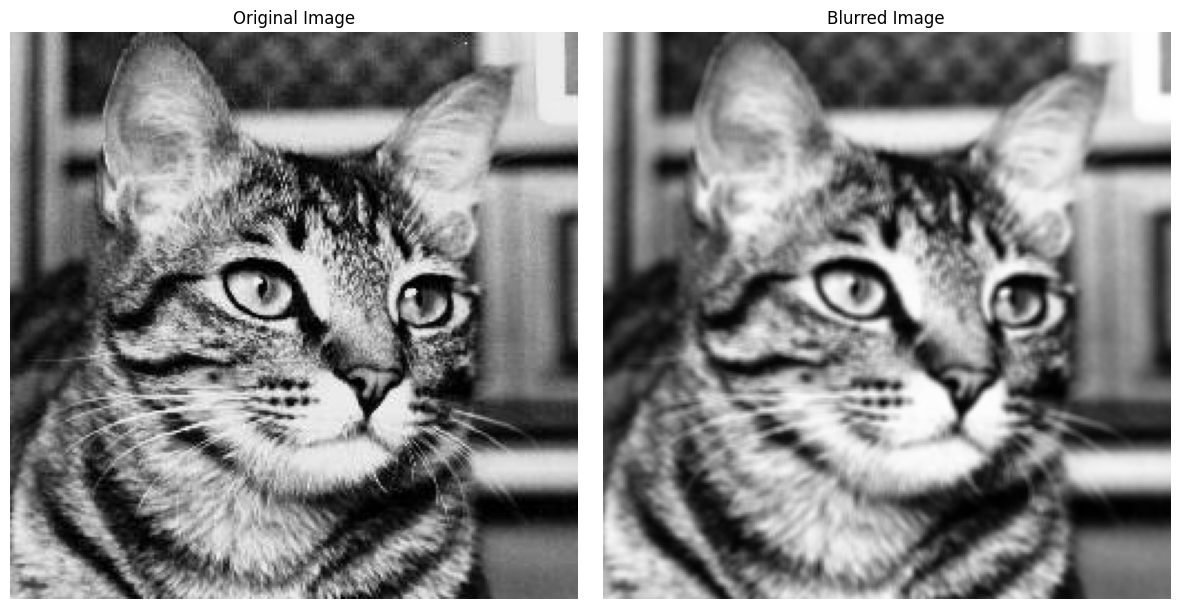

In [23]:
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))  # Optional: adjust figure size

# Original image (left)
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.title('Original Image')  # Optional: add title

# Blurred image (right)
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.imshow(img_blurred, cmap='gray')
plt.axis('off')
plt.title('Blurred Image')  # Optional: add title

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

### Edge Detection Kernels

#### The Prewitt Operator

$$
\text{horizontal} = \left[
\begin{matrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1 \\
\end{matrix}
\right]
$$

$$
\text{vertical} = \left[
\begin{matrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{matrix}
\right]
$$

#### Example - Horizontal Edges

$$
\text{window} = \left[
\begin{matrix}
200 & 255 & 193 & 201 \\
150 & 172 & 169 & 132\\
70 & 80 & 83 & 54\\
\end{matrix}
\right]
$$

If we use the horizontal filter on $\text{window}$ we get:

$$
\text{horizontal\_edges} = \left[
\begin{matrix}
-415 & -432
\end{matrix}
\right]
$$

#### Example - No Horizontal Edges

$$
\text{window} = \left[
\begin{matrix}
195 & 182 & 193 & 179 \\
150 & 172 & 169 & 132\\
176 & 201 & 195 & 187\\
\end{matrix}
\right]
$$

$$
\text{horizontal\_edges} = \left[
\begin{matrix}
2 & 29
\end{matrix}
\right]
$$

In [24]:
horizontal_edge_kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

vertical_edge_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

horizontal_edges = box_blur(img_array, horizontal_edge_kernel)
vertical_edges = box_blur(img_array, vertical_edge_kernel)

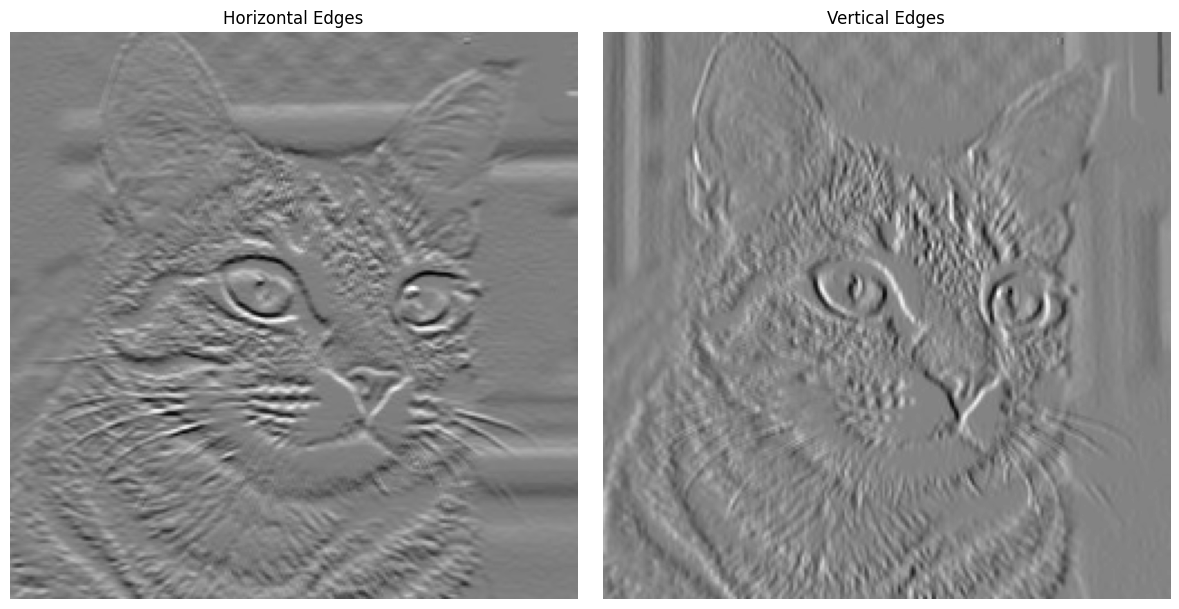

In [25]:
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))  # Optional: adjust figure size

# Original image (left)
plt.subplot(1, 2, 1)
plt.imshow(horizontal_edges, cmap='gray')
plt.axis('off')
plt.title('Horizontal Edges')  # Optional: add title

# Blurred image (right)
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.imshow(vertical_edges, cmap='gray')
plt.axis('off')
plt.title('Vertical Edges')  # Optional: add title

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

--- 
## Cross-Correlation and Convolution - An Intuitive Approach

Lines of Code: \[5, 10, 9, 21, 5, 7\]
Reviewers: \[1, 3, 5\]


#### Keeping track of lines read:

    - Day 0 - y[0] = 5*1 = 5
    - Day 1 - y[1] = 5*3 + 10*1 = 25
    - Day 2 - y[2] = 5*5 + 10*3 + 9*1 = 64
    - And so on and so forth...

#### Applying Cross Correlation

    - y[0] = 1*0 + 3*0 + 5*5 = 25
    - y[1] = 1*0 + 3*5 + 5*10 = 65
    - y[2] = 1*5 + 3*10 + 5*9 = 75
    - ...

#### Flipping the kernel?

    - y[0] = 5*0 + 3*0 + 1*5 = 5
    - y[1] = 5*0 + 3*5 + 1*10 = 25
    - y[2] = 5*5 + 3*10 + 1*9 = 64


### The Maths of Convolution and Cross-correlation


Take our convolution example, we have two lists of data, we flipped one of them and then multiply and sum. We can write this generally as:

#### Convolution

$$
y[n] = \sum_{i=0}^{M-1}x[i]k[n-i]
$$

$y[n]$ is any output and $M=\text{len(k)}$ where $k$ is the kernel.

#### Cross-correlation

$$
y[n] = \sum_{i=0}^{M-1}x[i]k[n+i]
$$

--- 

### Transition to Calculus

We can write both operations even more generally as:

#### Summation - Discrete

##### Convolution

$$
y[n] = \sum_{i=0}^{M-1}x(i)k(n-i)
$$

##### Cross-Correlation

$$
y[n] = \sum_{i=0}^{M-1}x(i)k(n+i)
$$

#### Integral - Continuous

##### Convolution

$$
\int^{\infty}_{-\infty} x(\tau)k(t-\tau) d\tau
$$

##### Cross-Correlation

$$
\int^{\infty}_{-\infty} x(\tau)k(t+\tau) d\tau
$$

---

## Implementing the Convolutional Layer

### The Three Properties of Convolutional Layers - Sparse Interactions, Parameter Sharing, Equivariance to Translation

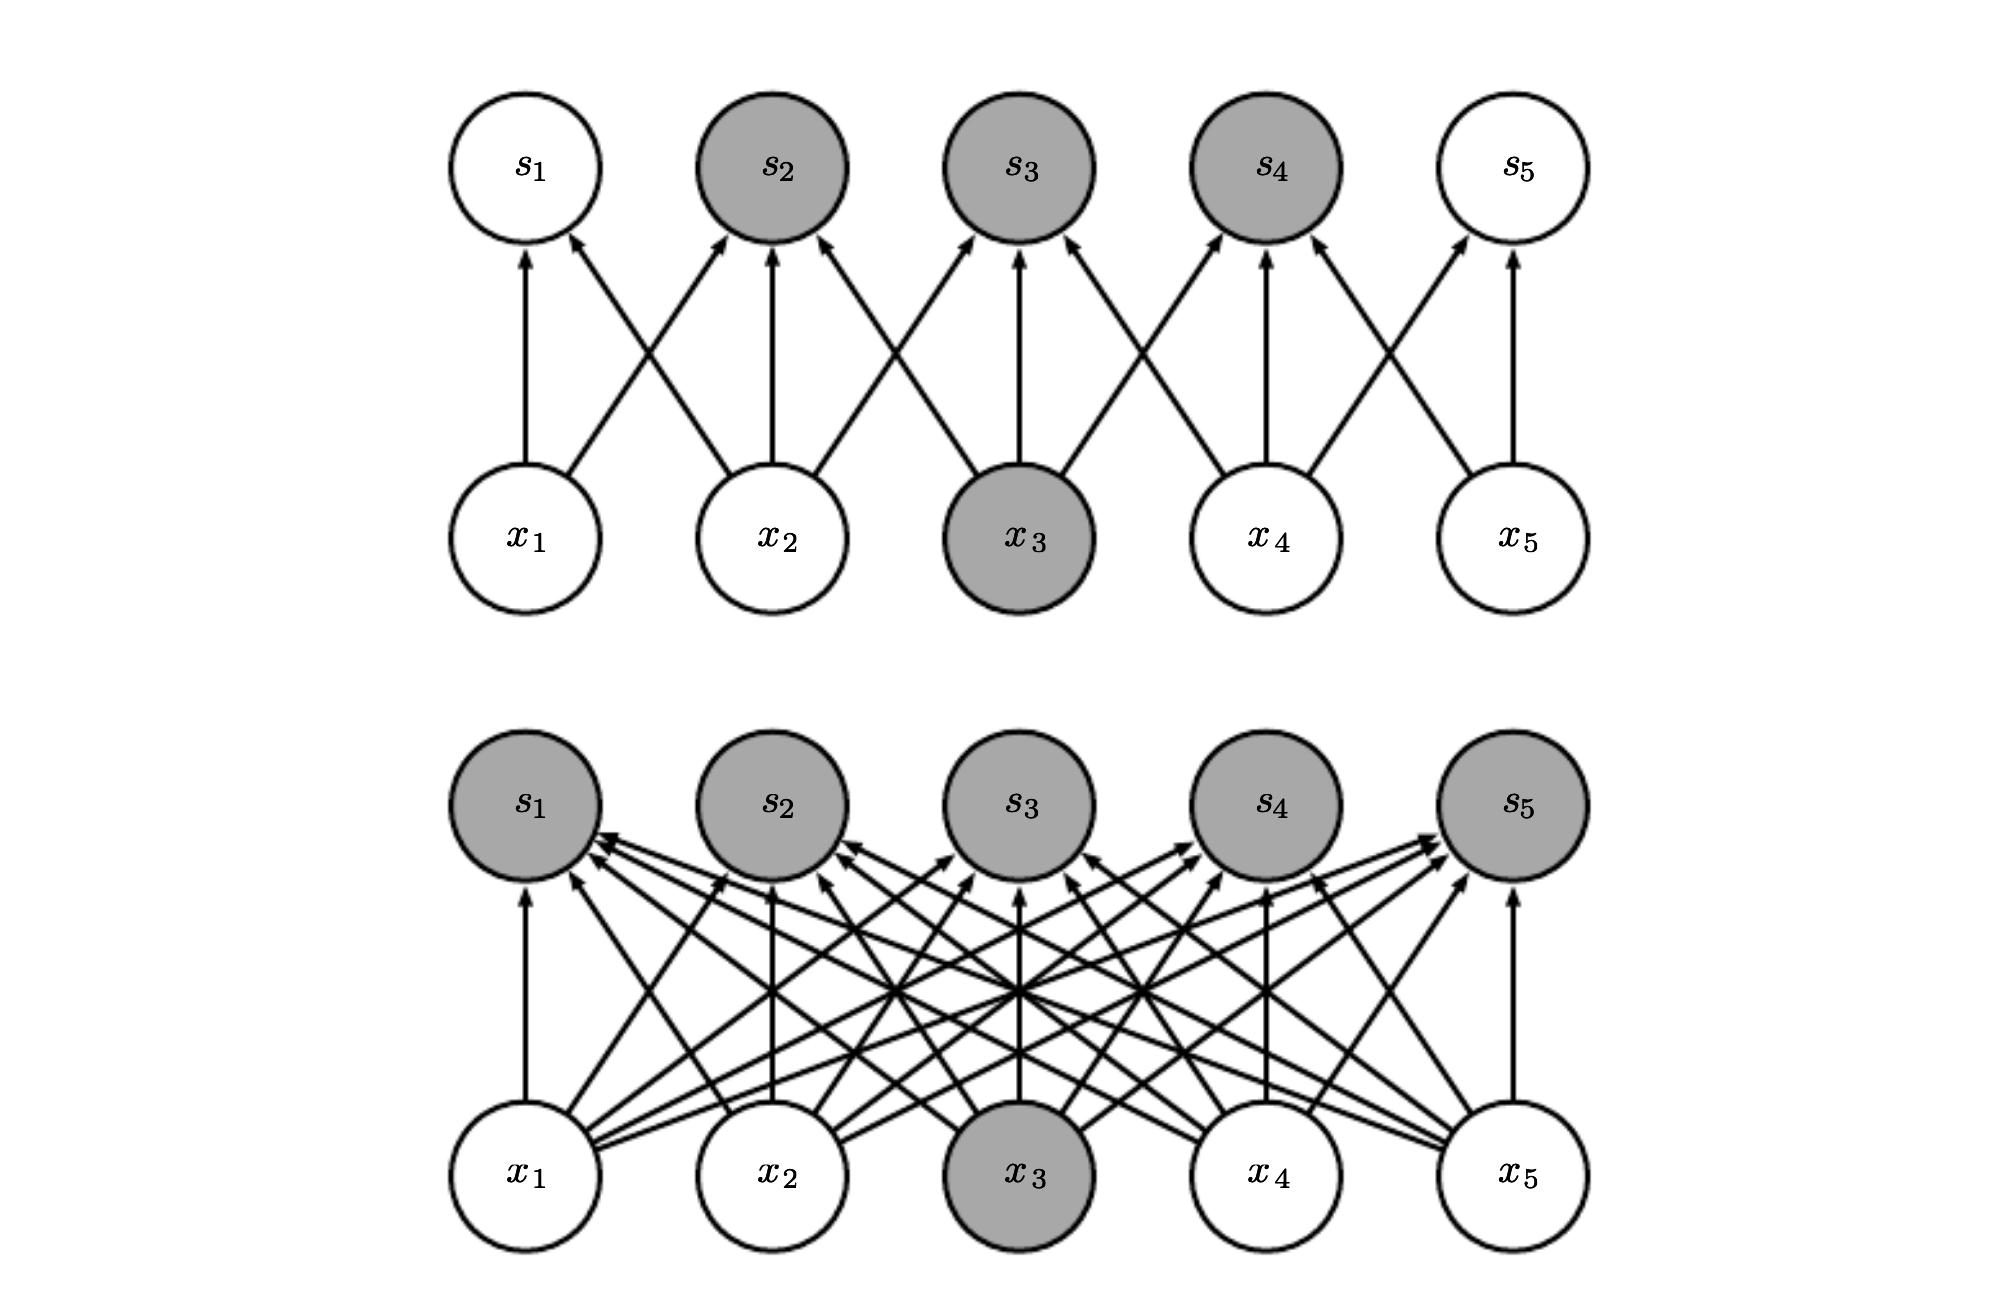


#### A Small Example - Im2row and Matmuls

Image matrix: m = number patches, n = length of a flattened patch. 

Kernel matrix:  n=length of a flatterned patch and p = number of kernels. 

Im2row output: $(m \times n)(n \times p) = (m \times p)$

In [26]:
# Lets make an example image (5x5) and a kernel (3x3) - no channels to keep it simple
np.random.seed(42)
image_no_channels = np.random.randint(0,256, (5,5))
np.random.seed(42)
kernel = np.random.randint(0,10, (3,3))

In [27]:
image_no_channels, kernel

(array([[102, 179,  92,  14, 106],
        [ 71, 188,  20, 102, 121],
        [210, 214,  74, 202,  87],
        [116,  99, 103, 151, 130],
        [149,  52,   1,  87, 235]]),
 array([[6, 3, 7],
        [4, 6, 9],
        [2, 6, 7]]))

#### Flattening the Input Image

$$
\begin{gather*}
\text{Patch 0}\\
\begin{bmatrix}
102 & 179 & 92 \\
71 & 188 & 20 \\
210 & 214 & 74\\
\end{bmatrix}
\xrightarrow{\text{flatten}}
\begin{bmatrix}
102 & 179 & 92 & 71 & 188 & 20 & 210 & 214 & 74
\end{bmatrix}
\end{gather*}
$$

Row 1 of image matrix, starting at 20 (position 1,2 in image_no_channels matrix) the patch would be:

$$
\begin{gather*}
\text{Patch 1}\\
\begin{bmatrix}
179 & 92 & 14\\
188 & 20 & 102\\
214 & 74 & 202\\
\end{bmatrix}
\xrightarrow{\text{flatten}}
\begin{bmatrix}
179 & 92 & 14 & 188 & 20 & 102 & 214 & 74 & 202
\end{bmatrix}
\end{gather*}
$$

And so on and so forth for the image_matrix. 

#### Flattening the Kernel

$$
\begin{gather*}
\text{Kernel}\\
\begin{bmatrix}
6 & 3 & 7\\
4 & 6 & 9\\
2 & 6 & 7\\
\end{bmatrix}
\xrightarrow{\text{flatten}}
\begin{bmatrix}
6\\
3\\
7\\
4\\
6\\
9\\
2\\
6\\
7\\
\end{bmatrix}
\end{gather*}
$$

In [28]:
image_matrix = np.array([
    [102, 179, 92, 71, 188, 20, 210, 214, 74],
    [179, 92, 14, 188, 20, 102, 214, 74, 202],
    [92, 14, 106, 20, 102, 121, 74, 202, 87],
    [71,188, 20, 210, 214, 74, 116, 99, 103],
    [188, 20, 102, 214, 74, 202, 99, 103, 151],
    [20, 102, 121, 74, 202, 87, 102, 151, 130],
    [210, 214, 74, 116, 99, 103, 149, 52, 1],
    [214, 74, 202, 99, 103, 151, 52, 1, 87],
    [74, 202, 87, 103, 151, 130, 1, 87, 235],
])
kernel_matrix = np.array([
    [6],
    [3],
    [7],
    [4],
    [6],
    [9],
    [2],
    [6],
    [7],
])
image_matrix.shape, kernel_matrix.shape

((9, 9), (9, 1))

In [29]:
# Traditional convolution approach
box_blur(image_no_channels, kernel)

array([[5607, 5524, 5086],
       [5467, 6893, 5586],
       [5022, 6012, 6316]])

##### Matrix Multiplication - A Recap

$$
c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} + ... + a_{in}b_{nj} = \sum_{k=0}^{n}a_{ik}b_{kj}
$$

#### Applying the Matmul

$$
\begin{align*}
c_{1,1} &= (102 \cdot 6) + (179 \cdot 3) + (92 \cdot 7) + (71 \cdot 4) + (188 \cdot 6) + (20 \cdot 9) + (210 \cdot 2) + (214 \cdot 6) + (74 \cdot 7) = 5607\\
c_{2,1} &= (179 \cdot 6) + (92 \cdot  3) + (14 \cdot 7) + (188 \cdot 4) + (20 \cdot 6) + (102 \cdot 9) + (214 \cdot 2) + (74 \cdot 6) + (202 \cdot 7) = 5524\\
c_{3,1} &= (92 \cdot 6) + (14 \cdot  3) + (106 \cdot 7) + (20 \cdot 4) + (102 \cdot 6) + (121 \cdot 9) + (74 \cdot 2) + (202 \cdot 6) + (87 \cdot 7) = 5086\\
\vdots \\
c_{9,1} &= (74 \cdot 6) + (202 \cdot 3) + (87 \cdot 7) + (103 \cdot 4) + (151 \cdot 6) + (130 \cdot 9) + (1 \cdot 2) + (87 \cdot 6) + (235 \cdot 7) = 6316
\end{align*}
$$

#### Output of Im2row

$$
\begin{bmatrix}
5607 \\
5542 \\
5086 \\
5467 \\
6893 \\
5586 \\
5022 \\
6012 \\
6316
\end{bmatrix}
$$

#### Reshaped output

$$
\begin{bmatrix}
5607 & 5542 & 5086 \\
5467 & 6893 & 5586 \\
5022 & 6012 & 6316
\end{bmatrix}
$$

In [30]:
# To double check we did it right
np.matmul(image_matrix, kernel_matrix)

array([[5607],
       [5524],
       [5086],
       [5467],
       [6893],
       [5584],
       [5022],
       [6012],
       [6316]])

### The General Case - Extension to RGB (3 channel) Images

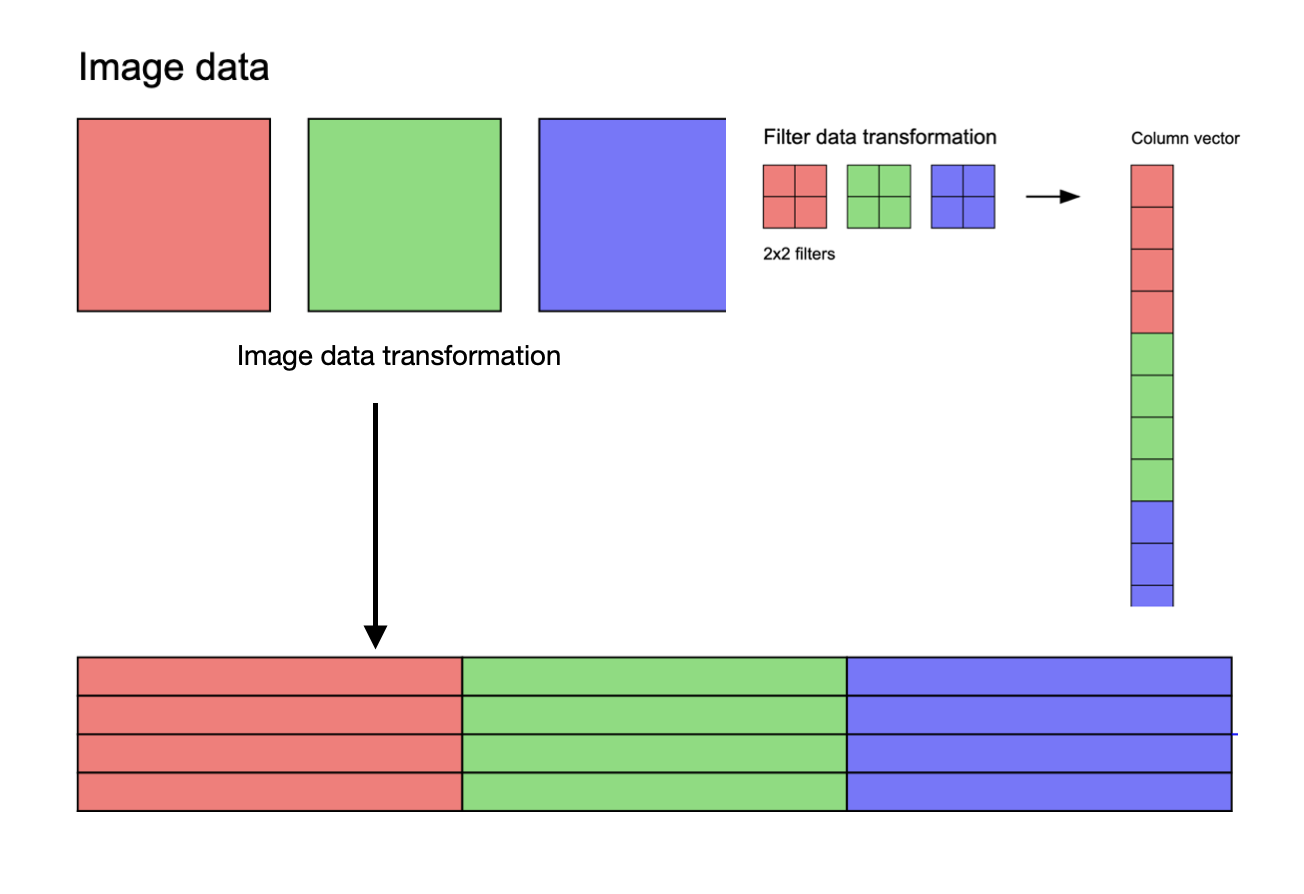

### Implenting Im2row
There are 3 pieces of the im2row puzzle:

    1 - Flattening the input patches
    2 - Doing the matmul
    3 - Reshaping matmul output

#### 1 - Flattening the patches

$$
\begin{align*}
\text{columns = }\frac{(W-K+2P)}{S}+1,\\[1em]
\text{rows = }\frac{(H-K+2P)}{S}+1
\end{align*}
$$
Where:

    - W = Width
    - H = Height
    - K = Kernel dimension
    - P = Padding (We assume 0 padding in all our examples/code for simplicity)
    - S = Stride (We set stride = 1, meaning we move the kernel across one 1 pixel at a time. This is sometimes set to higher numbers)

##### How 3 Channel Images are Represented in Data

In [31]:
# code-fold:true
np.random.seed(42)
# We do not add a batch dimension here. 
img_test = np.random.randint(0, 10, (3, 5, 5))
np.random.seed(42)
kernel = np.random.randint(0, 5, (3, 3, 3))

C, H, W = img_test.shape
print("5x5 grid where each position shows [R,G,B] values:\n")
for c in range(C):
    print(img_test[c])

kernel_c, k, k = kernel.shape
print("3x3 grid where each position shows [R,G,B] values:\n")
for k_c in range(kernel_c):
    print(kernel[k_c])

5x5 grid where each position shows [R,G,B] values:

[[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]
 [4 1 7 5 1]
 [4 0 9 5 8]]
[[0 9 2 6 3]
 [8 2 4 2 6]
 [4 8 6 1 3]
 [8 1 9 8 9]
 [4 1 3 6 7]]
[[2 0 3 1 7]
 [3 1 5 5 9]
 [3 5 1 9 1]
 [9 3 7 6 8]
 [7 4 1 4 7]]
3x3 grid where each position shows [R,G,B] values:

[[3 4 2]
 [4 4 1]
 [2 2 2]]
[[4 3 2]
 [4 1 3]
 [1 3 4]]
[[0 3 1]
 [4 3 0]
 [0 2 2]]


At each point in the 5x5 matrix we have an array of length 3. This array is the colour channels RGB, so instead of having 3 stacked matrices we have a 5x5 matrix where each element of the matrix is the channel! The kernel is the same, which ensures our RGB matmul is aligned, for both image and kernel the output matrix from im2row will be of the format: [<span style="color:red">R</span><span style="color:red">R</span><span style="color:red">R</span><span style="color:red">R</span>_<span style="color:green">G</span><span style="color:green">G</span><span style="color:green">G</span><span style="color:green">G</span>_<span style="color:blue">B</span><span style="color:blue">B</span><span style="color:blue">B</span><span style="color:blue">B</span>...]. This keeps the matmul aligned nicely.

In [35]:
def im2row(images, kernels, padding=0, stride=1):
    # 1 - Flattening the image and kernels
    
    # Use the formula to calculate number of patches
    C_img, H, W = images.shape
    N, C_kernel, k, k = kernels.shape

    if C_img != C_kernel:
        raise Exception("Your kernel and image channels are mismatched")
    else: 
        C = C_img

    # does int casting have any unintended consequences?
    height_kernel_fit = int(((H-k + 2*padding)/stride)+1)
    width_kernel_fit = int(((W-k + 2*padding)/stride)+1)

    n_patches = height_kernel_fit * width_kernel_fit
    patch_size = k * k * C
    
    # Pre-allocate array
    img_mat = np.zeros((n_patches, patch_size))

    # Get the start position of our operation, from there we pull out the kernel
    # We use numpy .flatten() to return the flattened image - try implement the flatten function yourself :)
    # This code works with one image at a time as input right now.
    idx = 0
    for i in range(height_kernel_fit):
        for j in range(width_kernel_fit):
            patch = images[:, i:i+k, j:j+k]
            patch = patch.flatten()
            img_mat[idx] = patch.flatten()
            idx += stride

    # Flip the dimensions such that the flatten just goes into it, then transpose at end of everything
    kernel_mat = np.zeros((N, patch_size))
    idx = 0
    for i in range(N):
        flattened_kernel = kernels[i].flatten()
        kernel_mat[idx] = flattened_kernel.T
        idx += 1
    kernel_mat = kernel_mat.T

    # Added for testing
    return img_mat, kernel_mat

In [36]:
np.random.seed(42)
img_test = np.random.randint(0, 10, (3, 5, 5))
np.random.seed(42)
kernel_test = np.random.randint(0, 5, (1, 3, 3, 3))

img_matrix, kernel_matrix = im2row(img_test, kernel_test)

In [37]:
img_matrix@kernel_matrix

array([[287.],
       [267.],
       [287.],
       [308.],
       [322.],
       [341.],
       [306.],
       [296.],
       [381.]])

#### 2 - The matmul


In [38]:
def im2row(images, kernels, padding=0, stride=1):
    # 1 - Flattening the image and kernels
    
    # Use the formula to calculate number of patches
    C_img, H, W = images.shape
    N, C_kernel, k, k = kernels.shape

    if C_img != C_kernel:
        raise Exception("Your kernel and image channels are mismatched")
    else: 
        C = C_img

    # does int casting have any unintended consequences?
    height_kernel_fit = int(((H-k + 2*padding)/stride)+1)
    width_kernel_fit = int(((W-k + 2*padding)/stride)+1)

    n_patches = height_kernel_fit * width_kernel_fit
    patch_size = k * k * C
    
    # Pre-allocate array
    img_mat = np.zeros((n_patches, patch_size))

    # Get the start position of our operation, from there we pull out the kernel
    idx = 0
    for i in range(height_kernel_fit):
        for j in range(width_kernel_fit):
            patch = images[:, i:i+k, j:j+k]
            patch = patch.flatten()
            img_mat[idx] = patch.flatten()
            idx += stride

    # Flip the dimensions such that the flatten just goes into it, then transpose at end of everything
    kernel_mat = np.zeros((N, patch_size))
    idx = 0
    for i in range(N):
        flattened_kernel = kernels[i].flatten()
        kernel_mat[idx] = flattened_kernel.T
        idx += 1
    kernel_mat = kernel_mat.T

    # 2 - The matmul!
    # Part 2 is very simple, a single line change.
    flattened_feature_map = img_mat@kernel_mat

    return flattened_feature_map

np.random.seed(42)
img_test = np.random.randint(0, 10, (3, 5, 5))
np.random.seed(42)
kernel_test = np.random.randint(0, 5, (1, 3, 3, 3))
output = im2row(img_test, kernel_test)
output.shape

(9, 1)

#### 3 - Reshaping The Matmul Output


In [39]:
def im2row(images, kernels, padding=0, stride=1):
    # 1 - Flattening the image and kernels
    
    # Use the formula to calculate number of patches
    C_img, H, W = images.shape
    N, C_kernel, k, k = kernels.shape

    if C_img != C_kernel:
        raise Exception("Your kernel and image channels are mismatched")
    else: 
        C = C_img

    # does int casting have any unintended consequences?
    height_kernel_fit = int(((H-k + 2*padding)/stride)+1)
    width_kernel_fit = int(((W-k + 2*padding)/stride)+1)

    n_patches = height_kernel_fit * width_kernel_fit
    patch_size = k * k * C
    
    # Pre-allocate array
    img_mat = np.zeros((n_patches, patch_size))

    # Get the start position of our operation, from there we pull out the kernel
    idx = 0
    for i in range(height_kernel_fit):
        for j in range(width_kernel_fit):
            patch = images[:, i:i+k, j:j+k]
            patch = patch.flatten()
            img_mat[idx] = patch.flatten()
            idx += stride

    # Flip the dimensions such that the flatten just goes into it, then transpose at end of everything
    kernel_mat = np.zeros((N, patch_size))
    idx = 0
    for i in range(N):
        flattened_kernel = kernels[i].flatten()
        kernel_mat[idx] = flattened_kernel.T
        idx += 1
    kernel_mat = kernel_mat.T

    # 2 - The matmul!
    # Part 2 is very simple, a single line change.
    flattened_feature_map = img_mat@kernel_mat

    print(flattened_feature_map.shape)
    print(flattened_feature_map)
        
    # 3 - The Reshape
    # We need to reshape each feature map
    feature_map = flattened_feature_map.T
    feature_map = feature_map.reshape(N,k,k)

    return feature_map

np.random.seed(42)
img_test = np.random.randint(0, 10, (3, 5, 5))
np.random.seed(42)
kernel_test = np.random.randint(0, 5, (1, 3, 3, 3))
output = im2row(img_test, kernel_test)
output.shape

(9, 1)
[[287.]
 [267.]
 [287.]
 [308.]
 [322.]
 [341.]
 [306.]
 [296.]
 [381.]]


(1, 3, 3)

In [40]:
output

array([[[287., 267., 287.],
        [308., 322., 341.],
        [306., 296., 381.]]])

### Batched im2row Operation

In [41]:
def im2row_batched(images, kernels, padding=0, stride=1):
    # 1 - Flattening the image and kernels
    
    # Use the formula to calculate number of patches
    # Extract B from images, B is the batch size
    B, C_img, H, W = images.shape
    N, C_kernel, k, k = kernels.shape

    if C_img != C_kernel:
        raise Exception("Your kernel and image channels are mismatched")
    else: 
        C = C_img

    # does int casting have any unintended consequences?
    height_kernel_fit = int(((H-k + 2*padding)/stride)+1)
    width_kernel_fit = int(((W-k + 2*padding)/stride)+1)

    n_patches = height_kernel_fit * width_kernel_fit
    patch_size = k * k * C

    # Pre-allocate array
    # Each individual image has n_patches and we have B images, thus the multiplication
    img_mat = np.zeros((B * n_patches, patch_size))
    print(img_mat.shape)

    idx = 0
    # Add another loop to handle batches. 
    for b in range(B):
        for i in range(height_kernel_fit):
            for j in range(width_kernel_fit):
                # We now index each image in the batch. This ensures our kernel doesn't interact at boundaries across two images.
                patch = images[b, :, i:i+k, j:j+k]
                patch = patch.flatten()
                img_mat[idx] = patch.flatten()
                idx += stride

    # Flip the dimensions such that the flatten just goes into it, then transpose at end of everything
    kernel_mat = np.zeros((N, patch_size))
    idx = 0
    for i in range(N):
        flattened_kernel = kernels[i].flatten()
        kernel_mat[idx] = flattened_kernel.T
        idx += 1
    kernel_mat = kernel_mat.T
    
    # 2 - The matmul!
    # Part 2 is very simple, a single line change.
    flattened_feature_map = img_mat@kernel_mat
        
    # 3 - The Reshape
    # We need to reshape each feature map
    feature_map = flattened_feature_map.T
    # Reshape our images back to the same format they came in in.
    feature_map = feature_map.reshape(B, N, k, k)

    return feature_map

np.random.seed(42)
img_test_batch = np.random.randint(0, 10, (2, 3, 5, 5))
np.random.seed(42)
kernel_test_batch = np.random.randint(0, 5, (1, 3, 3, 3))
output = im2row_batched(img_test_batch, kernel_test_batch)
output.shape

(18, 27)


(2, 1, 3, 3)

In [42]:
output

array([[[[287., 267., 287.],
         [308., 322., 341.],
         [306., 296., 381.]]],


       [[[300., 282., 261.],
         [325., 284., 283.],
         [302., 299., 318.]]]])

### A Convolutional Layer

In [82]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

torch.manual_seed(42)

class CustomConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init__()
        # Store the parameters of our conv
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size if isinstance(kernel_size, tuple) else (kernel_size, kernel_size)
        self.stride = stride
        self.padding = padding
        
        # The kernel is the main parameter of this conv. We need to manage them inside the layer rather
        # than providing them seperately as we did before.
        # Initialize weights (kernels) using PyTorch's parameter system
        # Shape: (out_channels, in_channels, kernel_height, kernel_width)
        # Seems that in ipynb we need the manual_seed after every random code piece to maintain the 
        # determinism
        #torch.manual_seed(42)
        self.weight = nn.Parameter(
            torch.randn(out_channels, in_channels, *self.kernel_size)
        )
        
    # x is the input to our conv layer
    def forward(self, x):
        # x shape: (batch_size, in_channels, height, width)
        B, C, H, W = x.shape
        k_h, k_w = self.kernel_size
        
        # Calculate output dimensions
        height_kernel_fit = int(((H - k_h + 2*self.padding)/self.stride) + 1)
        width_kernel_fit = int(((W - k_w + 2*self.padding)/self.stride) + 1)
        n_patches = height_kernel_fit * width_kernel_fit
        patch_size = k_h * k_w * C
        
        # Pre-allocate array
        # Each individual image has n_patches and we have B images, thus the multiplication
        img_mat = torch.zeros((B * n_patches, patch_size), device=x.device)
        
        # TODO: Implement im2row operation
        # 1. Handle padding if needed - I will not handle padding in the current implementation
        
        # 2. Extract and flatten patches
        
        idx = 0
        for b in range(B):
            for i in range(height_kernel_fit):
                for j in range(width_kernel_fit):
                    # We now index each image in the batch. This ensures our kernel doesn't interact at boundaries across two images.
                    patch = x[b, :, i:i+k_h, j:j+k_w]
                    patch = patch.flatten()
                    img_mat[idx] = patch.flatten()
                    idx += 1

        # Flip the dimensions such that the flatten just goes into it, then transpose at end of everything
        kernel_mat = torch.zeros((self.out_channels, patch_size), device=x.device)
        idx = 0
        for i in range(self.out_channels):
            flattened_kernel = self.weight[i].flatten()
            kernel_mat[idx] = flattened_kernel.T
            idx += 1
        kernel_mat = kernel_mat.T

        # 3. Perform matrix multiplication
        
        flattened_feature_map = img_mat@kernel_mat
        
        # 4. Reshape to proper output format
        
        feature_map = flattened_feature_map.T        
        output = feature_map.reshape(self.out_channels, B, height_kernel_fit, width_kernel_fit)
        # Permute to get (batch_size, out_channels, height, width)
        # permute reorders the dimensions based on the order we provide it
        output = output.permute(1, 0, 2, 3)
        
        return output

### Testing the Custom Convolution

In [83]:
batch_size = 4
in_channels = 3
out_channels = 5
height = 5
width = 5

kernel_size = 3

# Input image
#torch.manual_seed(42)
x = torch.randn(batch_size, in_channels, height, width)
    
# Initialize both convolution layers
pytorch_conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, bias=False)
custom_conv = CustomConv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)

# Copy weights from PyTorch conv to custom conv to ensure fair comparison
custom_conv.weight.data = pytorch_conv.weight.data.clone()

# Forward pass
pytorch_output = pytorch_conv(x)
custom_output = custom_conv(x)

# Compare outputs
diff = torch.abs(pytorch_output - custom_output)
max_diff = torch.max(diff).item()
mean_diff = torch.mean(diff).item()

print()
print(f"Output shapes:")
print(f"PyTorch Conv2d output shape: {pytorch_output.shape}")
print(f"Custom Conv2d output shape: {custom_output.shape}")
print(f"\nDifferences:")
print(f"Maximum absolute difference: {max_diff:.8f}")
print(f"Mean absolute difference: {mean_diff:.8f}")

# Test backward pass
loss = pytorch_output.sum()
loss.backward()
pytorch_grad = pytorch_conv.weight.grad.clone()

pytorch_conv.weight.grad = None  # Reset grad

loss = custom_output.sum()
loss.backward()
custom_grad = custom_conv.weight.grad.clone()

grad_diff = torch.abs(pytorch_grad - custom_grad)
max_grad_diff = torch.max(grad_diff).item()
mean_grad_diff = torch.mean(grad_diff).item()

print(f"\nGradient differences:")
print(f"Maximum gradient difference: {max_grad_diff:.8f}")
print(f"Mean gradient difference: {mean_grad_diff:.8f}")


Output shapes:
PyTorch Conv2d output shape: torch.Size([4, 5, 3, 3])
Custom Conv2d output shape: torch.Size([4, 5, 3, 3])

Differences:
Maximum absolute difference: 0.00000036
Mean absolute difference: 0.00000004

Gradient differences:
Maximum gradient difference: 0.00000095
Mean gradient difference: 0.00000038


In [84]:
import timeit

# Number of iterations for timing
n_iterations = 1000

# Time PyTorch implementation
pytorch_time = timeit.timeit(
    lambda: pytorch_conv(x), 
    number=n_iterations
)

# Time custom implementation
custom_time = timeit.timeit(
    lambda: custom_conv(x), 
    number=n_iterations
)

print(f"PyTorch Conv2d average time: {pytorch_time/n_iterations*1000:.3f} ms")
print(f"Custom Conv2d average time: {custom_time/n_iterations*1000:.3f} ms")
print(f"Custom implementation is {custom_time/pytorch_time:.1f}x slower than PyTorch")

PyTorch Conv2d average time: 0.072 ms
Custom Conv2d average time: 0.616 ms
Custom implementation is 8.5x slower than PyTorch


### A Fully Flegded CNN

In [93]:
# Make a dirty CNN to classify CIFAR10
class PytorchCNN(nn.Module):
    def __init__(self, in_channels):  
        super().__init__()  
        
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=16, kernel_size=3, bias=False)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(16, 32, 3, bias=False)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        
        # Final conv to flatten the network and get our predictions
        self.conv3 = nn.Conv2d(32, 10, 3, bias=False)  # 10 classes for CIFAR10
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        
        x = self.conv3(x)
        # Average over spatial dimensions and flatten
        x = x.mean([2, 3])  # This replaces need for adaptive pooling
        
        return x
  

In [94]:
# Make a dirty CNN to classify CIFAR10
class CustomCNN(nn.Module):
    def __init__(self, in_channels):  
        super().__init__()  
        
        self.conv1 = CustomConv2d(in_channels=in_channels, out_channels=16, kernel_size=3)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        
        self.conv2 = CustomConv2d(16, 32, 3)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        
        # Final conv to flatten the network and get our predictions
        self.conv3 = CustomConv2d(32, 10, 3)  # 10 classes for CIFAR10
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        
        x = self.conv3(x)
        # Average over spatial dimensions and flatten
        x = x.mean([2, 3])  # This replaces need for adaptive pooling
        
        return x

In [108]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))  # Single value for grayscale
])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                       download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                        shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                       shuffle=False, num_workers=2)

In [134]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define pytorch model
pytorch_model = PytorchCNN(in_channels=1).to(device)

pytorch_criterion = nn.CrossEntropyLoss()
pytorch_optimizer = torch.optim.Adam(pytorch_model.parameters(), lr=0.01)

In [135]:
# Evaluation function
def evaluate(model, dataloader, criterion, device):
    model.eval()  # Set to evaluation mode
    total_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():  # No need to track gradients
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return total_loss / len(dataloader), 100. * correct / total

# Training loop with evaluation
num_epochs = 1
for epoch in range(num_epochs):
    # Set to training mode
    pytorch_model.train() 
    
    pytorch_running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Train the pytorch CNN model
        pytorch_optimizer.zero_grad()
        
        pytorch_outputs = pytorch_model(inputs)
        
        pytorch_loss = pytorch_criterion(pytorch_outputs, labels)
        
        pytorch_loss.backward()
        pytorch_optimizer.step()
        
        pytorch_running_loss += pytorch_loss.item()
        
        if i % 250 == 249:    # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}]')
            print(f"PYTORCH CNN LOSS: {pytorch_running_loss / 250:.3f}")
            pytorch_running_loss = 0.0
    
    # Evaluate after each epoch
    pytorch_train_loss, pytorch_train_acc = evaluate(pytorch_model, trainloader, pytorch_criterion, device)
    
    pytorch_test_loss, pytorch_test_acc = evaluate(pytorch_model, testloader, pytorch_criterion, device)
    
    print(f'Epoch {epoch + 1}:')
    print(f'Pytorch Train Loss: {pytorch_train_loss:.3f}, Pytorch Train Acc: {pytorch_train_acc:.2f}%')
    print(f'Pytorch Test Loss: {pytorch_test_loss:.3f}, Pytorch Test Acc: {pytorch_test_acc:.2f}%')
    print('--------------------')

[Epoch 1, Batch 250]
PYTORCH CNN LOSS: 1.630
[Epoch 1, Batch 500]
PYTORCH CNN LOSS: 0.991
[Epoch 1, Batch 750]
PYTORCH CNN LOSS: 0.776
[Epoch 1, Batch 1000]
PYTORCH CNN LOSS: 0.638
[Epoch 1, Batch 1250]
PYTORCH CNN LOSS: 0.534
[Epoch 1, Batch 1500]
PYTORCH CNN LOSS: 0.442
[Epoch 1, Batch 1750]
PYTORCH CNN LOSS: 0.436
[Epoch 1, Batch 2000]
PYTORCH CNN LOSS: 0.363
[Epoch 1, Batch 2250]
PYTORCH CNN LOSS: 0.349
[Epoch 1, Batch 2500]
PYTORCH CNN LOSS: 0.349
[Epoch 1, Batch 2750]
PYTORCH CNN LOSS: 0.317
[Epoch 1, Batch 3000]
PYTORCH CNN LOSS: 0.308
[Epoch 1, Batch 3250]
PYTORCH CNN LOSS: 0.285
[Epoch 1, Batch 3500]
PYTORCH CNN LOSS: 0.286
[Epoch 1, Batch 3750]
PYTORCH CNN LOSS: 0.315
Epoch 1:
Pytorch Train Loss: 0.616, Pytorch Train Acc: 80.31%
Pytorch Test Loss: 0.600, Pytorch Test Acc: 80.96%
--------------------


In [130]:
# Load the CustomCNN to cpu as we have not optimised the implementation for the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define custom model
custom_model = CustomCNN(in_channels=1).to(device)

custom_criterion = nn.CrossEntropyLoss()
custom_optimizer = torch.optim.Adam(custom_model.parameters(), lr=0.01)

In [131]:
# Evaluation function
def evaluate(model, dataloader, criterion, device):
    model.eval()  # Set to evaluation mode
    total_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():  # No need to track gradients
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return total_loss / len(dataloader), 100. * correct / total

# Training loop with evaluation
num_epochs = 1
for epoch in range(num_epochs):
    # Set to training mode
    custom_model.train()
    
    custom_running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Train the custom CNN model
        custom_optimizer.zero_grad()
        
        custom_outputs = custom_model(inputs)
        
        custom_loss = custom_criterion(custom_outputs, labels)
        
        custom_loss.backward()
        custom_optimizer.step()
        
        custom_running_loss += custom_loss.item()
               
        if i % 250 == 249:    # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}]')
            print(f"CUSTOM CNN LOSS: {custom_running_loss / 250:.3f}")
            custom_running_loss = 0.0
    
    # Evaluate after each epoch
    custom_train_loss, custom_train_acc = evaluate(custom_model, trainloader, custom_criterion, device)
    
    custom_test_loss, custom_test_acc = evaluate(custom_model, testloader, custom_criterion, device)
    
    print(f'Epoch {epoch + 1}:')
    print(f'Custom Train Loss: {custom_train_loss:.3f}, Custom Train Acc: {custom_train_acc:.2f}%')
    print(f'Custom Test Loss: {custom_test_loss:.3f}, Custom Test Acc: {custom_test_acc:.2f}%')
    print('--------------------')

[Epoch 1, Batch 250]
CUSTOM CNN LOSS: 1.967
[Epoch 1, Batch 500]
CUSTOM CNN LOSS: 1.089
[Epoch 1, Batch 750]
CUSTOM CNN LOSS: 0.929
[Epoch 1, Batch 1000]
CUSTOM CNN LOSS: 0.730
[Epoch 1, Batch 1250]
CUSTOM CNN LOSS: 0.687
[Epoch 1, Batch 1500]
CUSTOM CNN LOSS: 0.647
[Epoch 1, Batch 1750]
CUSTOM CNN LOSS: 0.567
[Epoch 1, Batch 2000]
CUSTOM CNN LOSS: 0.500
[Epoch 1, Batch 2250]
CUSTOM CNN LOSS: 0.462
[Epoch 1, Batch 2500]
CUSTOM CNN LOSS: 0.451
[Epoch 1, Batch 2750]
CUSTOM CNN LOSS: 0.408
[Epoch 1, Batch 3000]
CUSTOM CNN LOSS: 0.386
[Epoch 1, Batch 3250]
CUSTOM CNN LOSS: 0.387
[Epoch 1, Batch 3500]
CUSTOM CNN LOSS: 0.377
[Epoch 1, Batch 3750]
CUSTOM CNN LOSS: 0.344
Epoch 1:
Custom Train Loss: 0.329, Custom Train Acc: 89.62%
Custom Test Loss: 0.310, Custom Test Acc: 90.45%
--------------------


---